In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [4]:
session_keys = experiment.Session.fetch('KEY')

In [5]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

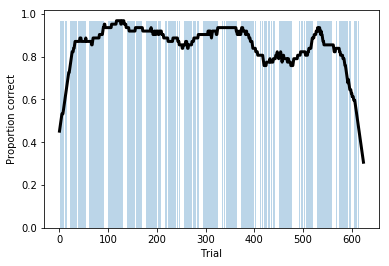

In [6]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [7]:
photostims = experiment.Photostim * experiment.BrainLocation

In [8]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

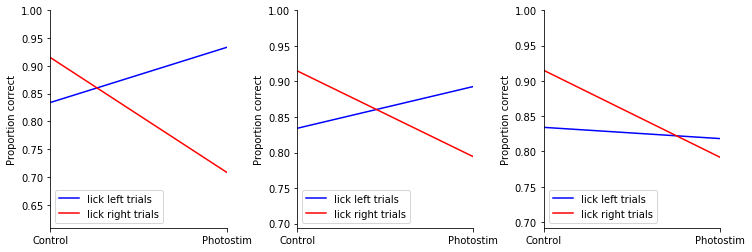

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking with spiking overlay

In [12]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [39]:
unit_key = units[6]

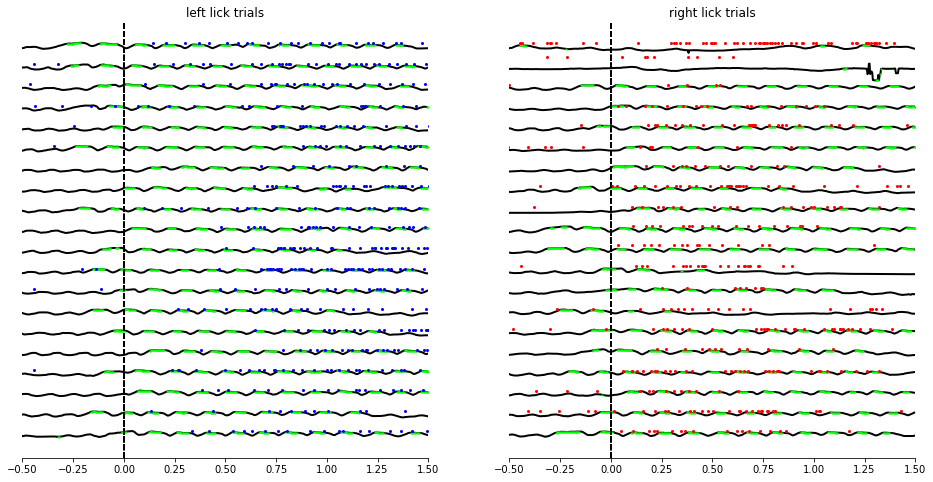

In [40]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=20)

# Plot single-trial jaw movement

In [15]:
tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,tracking_samples number of events,task task type,task_protocol task protocol,trial_instruction,early_lick,outcome
435884,1,11,Camera 0,1919,audio delay,1,right,no early,hit
435884,1,12,Camera 0,2465,audio delay,1,left,no early,hit
435884,1,13,Camera 0,1997,audio delay,1,right,no early,hit
435884,1,14,Camera 0,2390,audio delay,1,right,no early,hit
435884,1,15,Camera 0,2298,audio delay,1,right,no early,hit
435884,1,16,Camera 0,2454,audio delay,1,right,no early,hit
435884,1,17,Camera 0,2182,audio delay,1,left,no early,hit


In [16]:
trials = (tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent).fetch('KEY')

In [17]:
trial_key = trials[5]

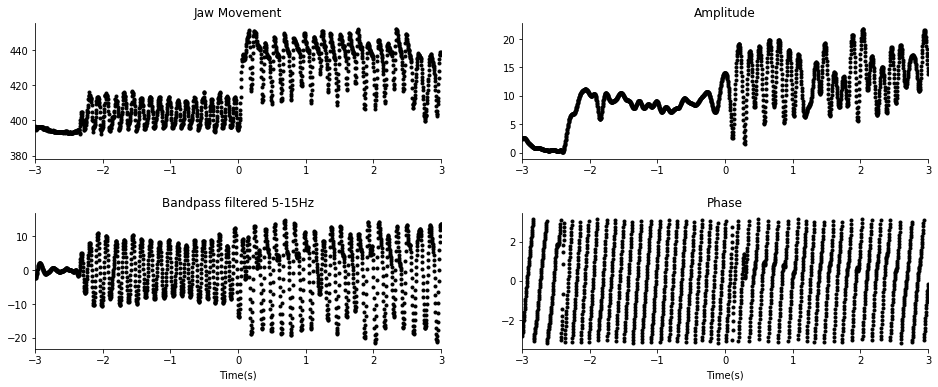

In [18]:
behavior_plot.plot_trial_jaw_movement(trial_key);

# Plot sliding-window phase distribution of jaw movement

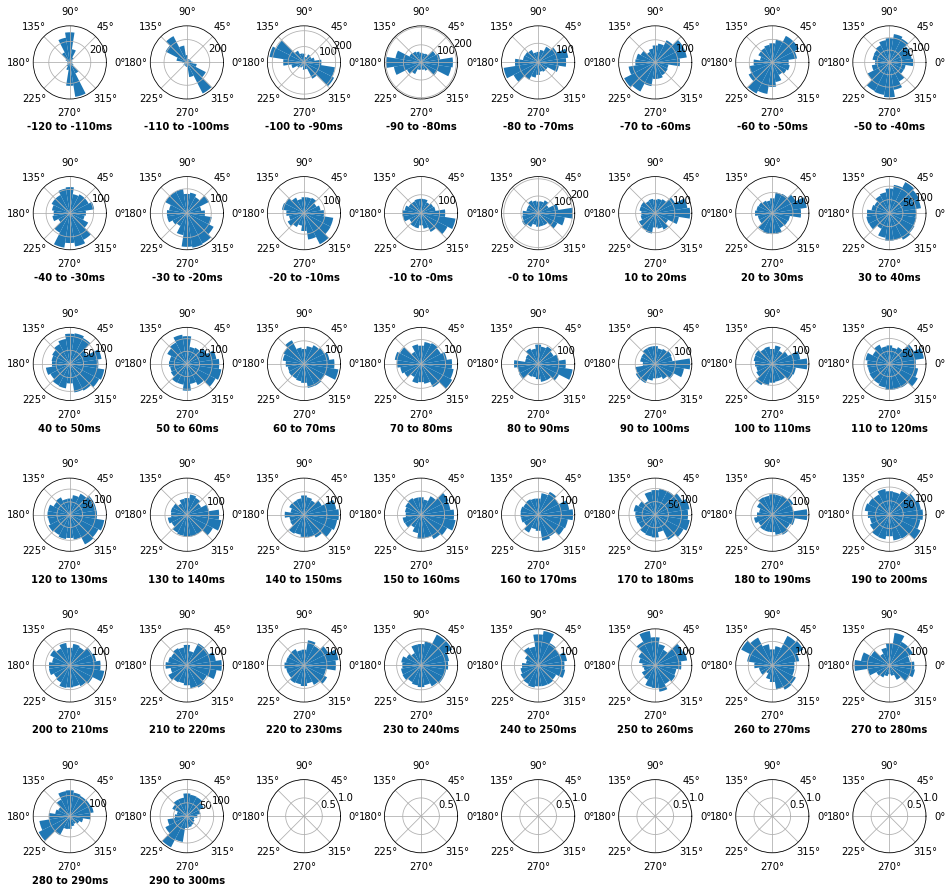

In [20]:
behavior_plot.plot_windowed_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), w_size=0.01, bin_counts=20)

# Plot all phase distribution of jaw movement

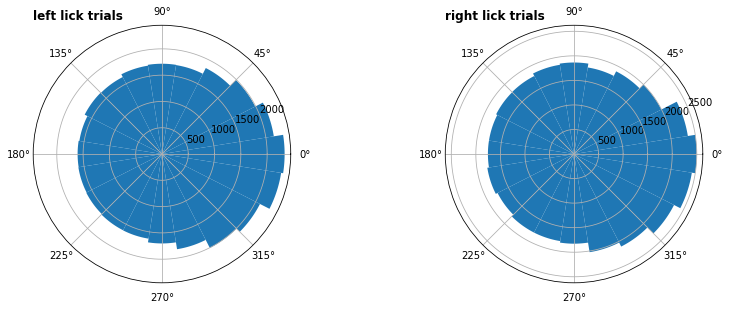

In [19]:
behavior_plot.plot_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), bin_counts=20)

# =============================================

In [28]:
import importlib
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>